In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc 

In [3]:
# load data as a pandas dataframe
df = pd.read_csv('https://github.com/Explore-AI/Public-Data/blob/master/exports%20ZAR-USD-data.csv?raw=true', index_col=0)
#view the data
df.head()

,ZAR/USD,Value of Exports (ZAR)
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45


In [4]:
# we shall chose the Rand/Dollar rate as our dependendant variable  and the monthly value of exports a the independent variable
#change the column names to reflect the notation we shall use
df.columns = ['Y', 'X']# renames the column names to y and x
df.head()

,Y,X
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45


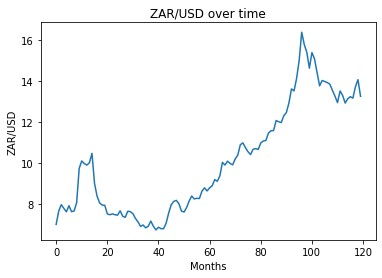

In [6]:
#plotting the ZAR/USD exchange rate over time
plt.plot(np.arange(len(df.Y)), df.Y)# creates a line plot for the ZAR/USD values
plt.title("ZAR/USD over time")
plt.xlabel("Months")
plt.ylabel("ZAR/USD")
plt.show()

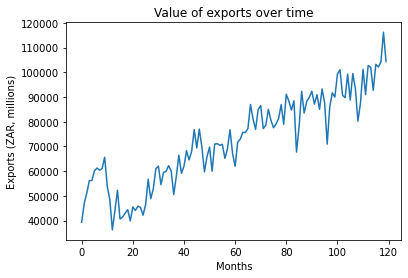

In [7]:
# create a plot to visualize the value of  exports from South Africa  measured in Millions of ZAR
# will help show trends in export activity and economic perfomance over the same period 
plt.plot(np.arange(len(df.X)), df.X)
plt.title("Value of exports over time")
plt.xlabel("Months")
plt.ylabel("Exports (ZAR, millions)")
plt.show()

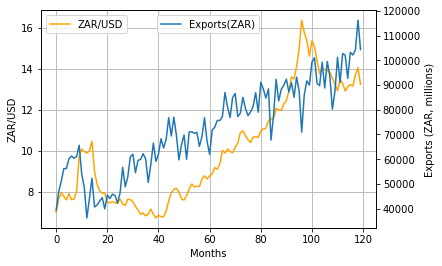

In [8]:
rc ('mathtext', default = 'regular')
fig  = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(len(df.Y)), df.Y, '-', label = 'ZAR/USD', color = 'orange')
ax2 = ax.twinx()
ax2.plot(np.arange(len(df.X)), df.X, '-', label ='Exports(ZAR)')

ax.legend(loc=2)
ax2.legend(loc=9)
ax.grid()
ax.set_xlabel("Months")
ax.set_ylabel("ZAR/USD")
ax2.set_ylabel("Exports (ZAR, millions)")
plt.show()

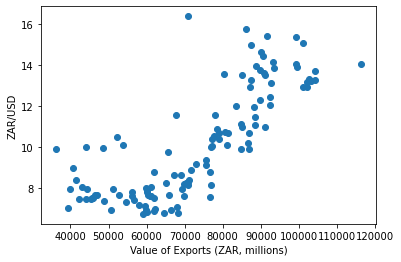

In [9]:
#showing the relationship between the two variables using a scatter plot
plt.scatter(df['X'], df['Y'])
plt.ylabel("ZAR/USD")
plt.xlabel("Value of Exports (ZAR, millions)")
plt.show()

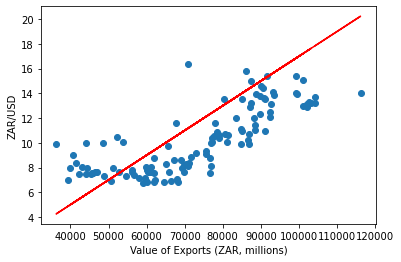

In [14]:
# Define a function to generate predicted values of 'Y' (ZAR/USD) for a given list of 'X' (Value of Exports),
# based on linear equation parameters 'm' (slope) and 'c' (intercept)
def gen_y(x_list, m, c):
    y_gen = []
    for x_i in x_list:
        y_i = m*x_i +c
        y_gen.append(y_i)
    return (y_gen)
y_gen= gen_y(df.X, 0.0002, -3)

plt.scatter(df.X, df.Y)
plt.plot(df.X, y_gen, color='red')
plt.ylabel("ZAR/USD")
plt.xlabel("Value of Exports (ZAR, millions)")
plt.show()

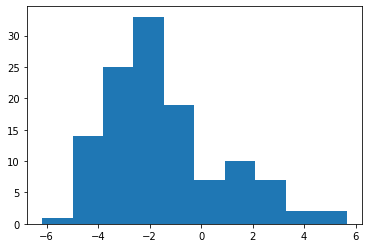

In [16]:
# checking the calculated fit of the line by measuring how far the true y-values of ach point are
errors= np.array(df.Y - y_gen)
np.round(errors, 2)
plt.hist(errors)
plt.show()


In [18]:
print("Residual sum of squares: ", (errors **2).sum())
"""
An RSS value of 867 indicates that the model's predictions are significantly deviating
 from the actual data points. A high RSS value suggests that the simple linear regression model
   does not capture the underlying pattern effectively, leading to inaccurate predictions
     and implying a poor fit between the model and the observed data.
"""


Residual sum of squares:  867.1710481532764


"\nAn RSS value of 867 indicates that the model's predictions are significantly deviating\n from the actual data points. A high RSS value suggests that the simple linear regression model\n   does not capture the underlying pattern effectively, leading to inaccurate predictions\n     and implying a poor fit between the model and the observed data.\n"